In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the dataset in the Datasets folder. What is the domain of the instances? What is the label set ? What type of learning problem does it describe?

Use a linear model to solve the problem.

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

<AxesSubplot:title={'center':'Test set'}, xlabel='x_1', ylabel='x_2'>

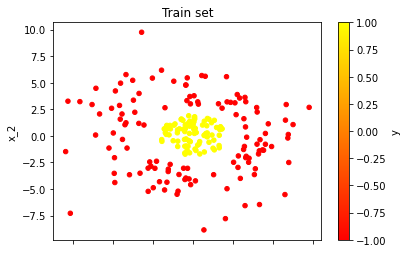

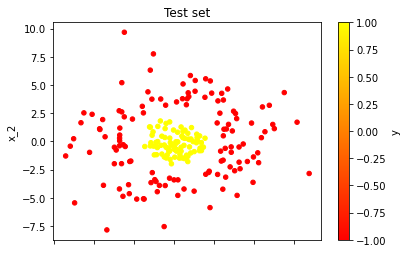

In [2]:
train = pd.read_csv("./Datasets/traindata.csv")
train.plot.scatter(x='x_1',y='x_2',c='y',colormap='autumn',title='Train set')

test = pd.read_csv("./Datasets/testdata.csv")
test.plot.scatter(x='x_1',y='x_2',c='y',colormap='autumn',title='Test set')

The domain of the instances in a subset of R^2

The label set is {0,1}

It describes a binary classification problem

<AxesSubplot:title={'center':'Now data are clearly separable with a straight line'}, xlabel='x_1', ylabel='x_3'>

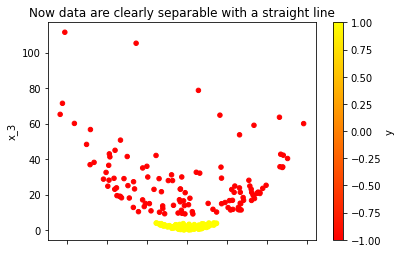

In [3]:
#add one more dimension x_3 = x_1**2 + x_2**2
train['x_3'] = train.x_1**2+train.x_2**2
#plot them on x_3 axis
train.plot.scatter(x='x_1',y='x_3',c='y',colormap='autumn',title='Now data are clearly separable with a straight line')

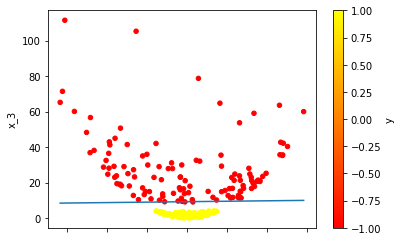

In [4]:
from sklearn import linear_model
X = train[['x_1','x_2','x_3']]
y = train['y']

#Train
clf = linear_model.SGDClassifier(alpha=0.01, max_iter=1000)
clf.fit(X, y)
#Get list of coefficent of the plane classifying data
w=clf.coef_[0].tolist()
b = clf.intercept_[0]

#Plot the plane on x_3 axis
absi = np.linspace(min(X["x_1"]),max(X["x_1"]),500)
ordo = -absi*w[0]/w[2]-b/w[2]
train.plot.scatter(x='x_1',y='x_3',c='y',colormap='autumn')
plt.plot(absi,ordo)
z = np.sqrt(np.abs(w[2])) #x_3 = x_1**2 + x_2**2 is an equation of circle, so sqrt(w[2]) = radius of the circle

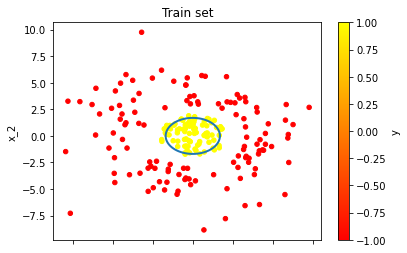

In [5]:
train.plot.scatter(x='x_1',y='x_2',c='y',colormap='autumn',title='Train set')
#plot the circle 
theta = np.linspace(0, 2*np.pi, 100)
a, b = z*np.cos(theta), z*np.sin(theta)
plt.plot(a, b, linestyle='-', linewidth=2, label='Circle')


In [18]:
from sklearn.metrics import zero_one_loss

#Compute the empirical and generalization errors
train['x_3'] = train.x_1**2+train.x_2**2
test['x_3'] = test.x_1**2+test.x_2**2
Xtrain = train[['x_1','x_2','x_3']]
ytrain = train['y']
Xtest = test[['x_1','x_2','x_3']]
ytest = test['y']

clf = linear_model.SGDClassifier(alpha=0.01, max_iter=1000)
clf.fit(Xtrain,ytrain)

yhat_train = clf.predict(Xtrain)
yhat_test = clf.predict(Xtest)

print("Empirical error:", zero_one_loss(yhat_train,ytrain))
print("Generalization error:", zero_one_loss(yhat_test,ytest))

Empirical error: 0.0
Generalization error: 0.0
